In [2]:
import numpy as np

from scipy import optimize

from matplotlib import pyplot as plt

from pandas import read_csv
from pandas import DataFrame

from sklearn.preprocessing import MinMaxScaler as scaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


(100144, 32)
<bound method NDFrame.describe of         patient_id     x1     x2      x3      x4     x5     x6     x7     x8  \
0                1  17.99  10.38  122.80  1001.0  0.118  0.278  0.300  0.147   
1                2  20.57  17.77  132.90  1326.0  0.085  0.079  0.087  0.070   
2                3  19.69  21.25  130.00  1203.0  0.110  0.160  0.197  0.128   
3                4  11.42  20.38   77.58   386.1  0.143  0.284  0.241  0.105   
4                5  20.29  14.34  135.10  1297.0  0.100  0.133  0.198  0.104   
...            ...    ...    ...     ...     ...    ...    ...    ...    ...   
100139         565  21.56  22.39  142.00  1479.0  0.111  0.116  0.244  0.139   
100140         566  20.13  28.25  131.20  1261.0  0.098  0.103  0.144  0.098   
100141         567  16.60  28.08  108.30   858.1  0.085  0.102  0.093  0.053   
100142         568  20.60  29.33  140.10  1265.0  0.118  0.277  0.351  0.152   
100143         569   7.76  24.54   47.92   181.0  0.053  0.044  0.000  0.

C:\Users\Vedant\AppData\Local\Temp/ipykernel_42032/76247311.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  X.hist(ax=ax)


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>],
       [<AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>],
       [<AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>],
       [<AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21'}>,
        <AxesSubplot:title={'center':'x

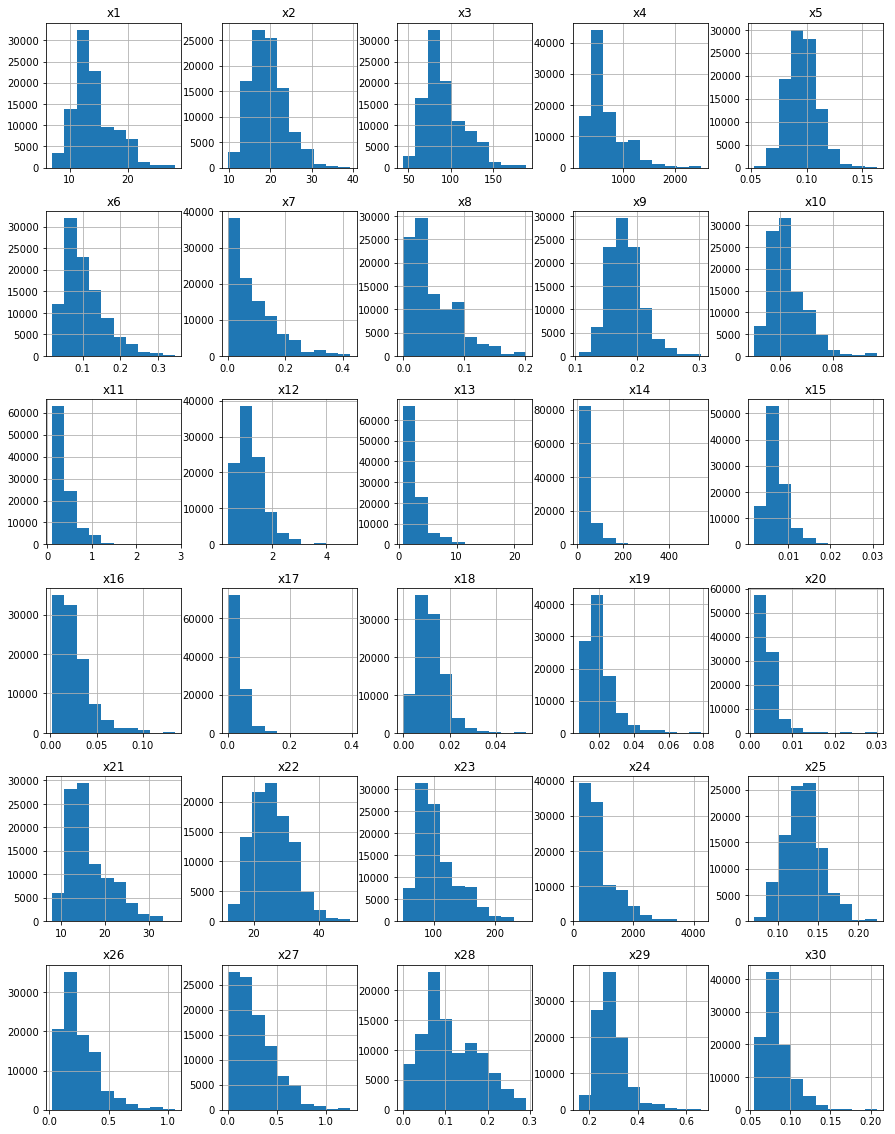

In [3]:
df = read_csv('./data/cancer_100k.csv')

print(df.shape)
print(df.describe)

X, y = df.iloc[:, 1:-1], df.iloc[:, [-1]]

fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
X.hist(ax=ax)


### Preprocessing

(100144, 30)
<bound method NDFrame.describe of               x1        x2        x3        x4        x5        x6        x7  \
0       0.521037  0.022658  0.545989  0.363733  0.590909  0.794479  0.702576   
1       0.643144  0.272574  0.615783  0.501591  0.290909  0.184049  0.203747   
2       0.601496  0.390260  0.595743  0.449417  0.518182  0.432515  0.461358   
3       0.210090  0.360839  0.233501  0.102906  0.818182  0.812883  0.564403   
4       0.629893  0.156578  0.630986  0.489290  0.427273  0.349693  0.463700   
...          ...       ...       ...       ...       ...       ...       ...   
100139  0.690000  0.428813  0.678668  0.566490  0.527273  0.297546  0.571429   
100140  0.622320  0.626987  0.604036  0.474019  0.409091  0.257669  0.337237   
100141  0.455251  0.621238  0.445788  0.303118  0.290909  0.254601  0.217799   
100142  0.644564  0.663510  0.665538  0.475716  0.590909  0.791411  0.822014   
100143  0.036869  0.501522  0.028540  0.015907  0.000000  0.076687  0.000

C:\Users\Vedant\AppData\Local\Temp/ipykernel_42032/23610819.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scaled_X.hist(ax=ax)


array([[<AxesSubplot:title={'center':'x1'}>,
        <AxesSubplot:title={'center':'x2'}>,
        <AxesSubplot:title={'center':'x3'}>,
        <AxesSubplot:title={'center':'x4'}>,
        <AxesSubplot:title={'center':'x5'}>],
       [<AxesSubplot:title={'center':'x6'}>,
        <AxesSubplot:title={'center':'x7'}>,
        <AxesSubplot:title={'center':'x8'}>,
        <AxesSubplot:title={'center':'x9'}>,
        <AxesSubplot:title={'center':'x10'}>],
       [<AxesSubplot:title={'center':'x11'}>,
        <AxesSubplot:title={'center':'x12'}>,
        <AxesSubplot:title={'center':'x13'}>,
        <AxesSubplot:title={'center':'x14'}>,
        <AxesSubplot:title={'center':'x15'}>],
       [<AxesSubplot:title={'center':'x16'}>,
        <AxesSubplot:title={'center':'x17'}>,
        <AxesSubplot:title={'center':'x18'}>,
        <AxesSubplot:title={'center':'x19'}>,
        <AxesSubplot:title={'center':'x20'}>],
       [<AxesSubplot:title={'center':'x21'}>,
        <AxesSubplot:title={'center':'x

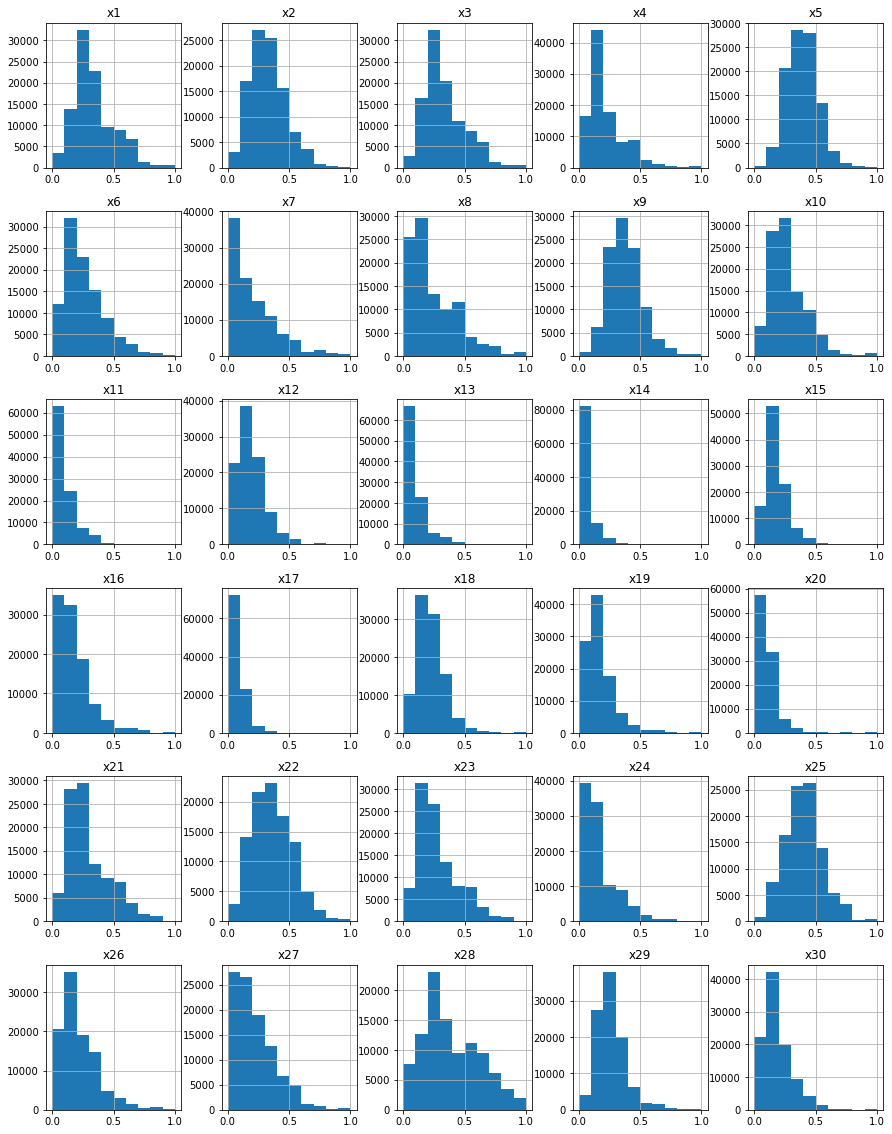

In [4]:
scaled = scaler().fit_transform(X)
scaled_X = DataFrame(scaled, columns=X.columns)

print(scaled_X.shape)
print(scaled_X.describe)

fig = plt.figure(figsize=(15, 20))
ax = fig.gca()
scaled_X.hist(ax=ax)


### Built-in methods

In [5]:
pca = PCA(n_components=5)
pca_X = pca.fit_transform(scaled_X)
pca_df_X = DataFrame(pca_X)

print(pca_df_X.shape)
print(pca_df_X.describe)


(100144, 5)
<bound method NDFrame.describe of                0         1         2         3         4
0       1.386775  0.426607 -0.541819  0.051897 -0.065140
1       0.462315 -0.553320 -0.205248 -0.038559  0.017290
2       0.956352 -0.106473 -0.147806  0.007635 -0.030007
3       1.002831  1.524709 -0.058281 -0.209269 -0.216171
4       0.626850 -0.302322 -0.404414  0.246229  0.001927
...          ...       ...       ...       ...       ...
100139  1.003794 -0.477860 -0.095728  0.274980 -0.084219
100140  0.619969 -0.522123  0.402378  0.176260 -0.098917
100141  0.226609 -0.292121  0.314989 -0.015221  0.216260
100142  1.678482  0.336059  0.294099 -0.158060  0.067255
100143 -0.904321 -0.102258  0.383274  0.063879  0.076084

[100144 rows x 5 columns]>


In [210]:
X_train, X_test, y_train, y_test = train_test_split(pca_df_X, y, test_size=0.20, random_state=0)

lr_model = LogisticRegression()
lr_model.fit(X_train.values, y_train.values)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

Accuracy = 0.9780817814169455


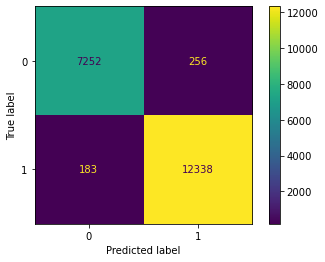

In [212]:
predictions = lr_model.predict(X_test.values)

ConfusionMatrixDisplay.from_predictions(y_test.values, predictions)
print(f"Accuracy = {lr_model.score(X_test.values, y_test.values)}")


### Manual Implementation

In [ ]:
#gamma matrix calculation

def Z(X):
    #assume that X is an n x d dataset (n rows of observations, d columns of features) and Y (output) is the last column in dataset
    Z = X.copy()
    row = np.ones(len(X))
    Z.insert(0, "ones", row)
    return Z
def gamma(Z):
    Z = Z(X)
    gamma = Z.T * Z
    return gamma
def k_gamma(gamma):
    d = len(gamma) - 2
    L = L(gamma)
    Q = Q(gamma)
    k_g = np.zeros((d+1, d+1))
    k_g[0, 0] = len(gamma.columns)
    k_g[1:, 0] = L
    k_g[0, 1:] = np.transpose(L)
    for i in range(d):
        k_Q[i+1, i+1] = Q[i, i]
    return k_g
def L(gamma):
    d = len(gamma) - 2
    return gamma[1:d+1, 0]
def Q(gamma):
    d = len(gamma.columns)
    return gamma[1:d+1, 1:d+1]
#if working in chunks, intermediate gammas should be d x d in size according to paper.
def update_gamma(old_gamma, new_gamma):
    return old_gamma.add(new_gamma, fill_value=0)

In [6]:
# PCA

def pca(X, n_components=5):
    m, n = X.shape

    # eigenvectors and eigenvalues
    U = np.zeros(n)
    S = np.zeros(n)

    Sigma = (1 / m) * (X.T.dot(X))
    U, S, V = np.linalg.svd(Sigma)

    # dimensionality reduction
    Z = np.zeros((X.shape[0], n_components))

    Z = np.dot(X,  U[:, :n_components])

    return Z


In [41]:
# Class Decomposition using K-Means

def init_centroids(X, k):
    # randomly select k data points as initial centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    return centroids


def find_closest_centroid(x, centroids):
    J = np.sqrt(np.sum(np.square(x - centroids), axis=1))

    return np.argmin(J)


def find_closest_centroids(X, centroids):
    # for each data point in X, find the index of the closest centroid
    idx = [find_closest_centroid(x, centroids) for x in X]

    return idx


def compute_means(X, idx, K):
    m, n = X.shape
    centroids = np.zeros((K, n))

    for i in np.arange(K):
        centroids[i] = np.mean(X[idx == i], axis=0)

    return centroids


def run_kmeans(X, K, max_iters=10):
    # initialize the centroids
    centroids = init_centroids(X, K)

    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)

        centroids = compute_means(X, idx, K)

    return idx, centroids


def fit(X, y, K, max_iters=10):
    X = np.array(X)

    # separate data into classes
    class_0_indices = np.where(y == 0)[0]
    class_1_indices = np.where(y == 1)[0]

    class_0 = np.take(X, class_0_indices, axis=0)
    class_1 = np.take(X, class_1_indices, axis=0)

    model = {
        'class_0': run_kmeans(class_0, K, max_iters),
        'class_1': run_kmeans(class_1, K, max_iters)
    }

    return model


def predict(X, model):
    predictions = []

    X = np.array(X)

    for x in X:
        # find closest centroids from each class
        idx_0 = find_closest_centroid(x, model['class_0'][1])
        idx_1 = find_closest_centroid(x, model['class_1'][1])

        # predict class
        closest_centroid = find_closest_centroid(
            x, np.array([model['class_0'][1][idx_0], model['class_1'][1][idx_1]]))

        predictions.append(closest_centroid)

    return predictions


In [8]:
# computing PCA

pca_X = pca(scaled_X, n_components=5)
pca_df_X = DataFrame(np.hstack((np.ones((pca_X.shape[0], 1)), pca_X)))

print(pca_df_X.shape)
print(pca_df_X.describe)


(100144, 6)
<bound method NDFrame.describe of           0         1         2         3         4         5
0       1.0 -2.590568  0.258405  0.852720  0.072661  0.273833
1       1.0 -1.688171  0.598494 -0.126026 -0.027001  0.201229
2       1.0 -2.209100  0.421276  0.203207  0.013605  0.086210
3       1.0 -2.694019 -1.004863  0.849820 -0.208399  0.038119
4       1.0 -1.816310  0.521867  0.197115  0.264582  0.271627
...     ...       ...       ...       ...       ...       ...
100139  1.0 -2.171508  0.743602  0.004217  0.279354  0.072177
100140  1.0 -1.952556  0.495716 -0.456881  0.159862 -0.211112
100141  1.0 -1.561901  0.242216 -0.243919 -0.032513 -0.332346
100142  1.0 -2.990131  0.270147  0.397891 -0.177938 -0.387997
100143  1.0 -0.589263 -0.354457 -0.458222  0.046492 -0.279104

[100144 rows x 6 columns]>


In [69]:
# training

X_train, X_test, y_train, y_test = train_test_split(pca_df_X, y, test_size=0.20, random_state=0)

model = fit(X_train, y_train, K=7, max_iters=10) # @TODO: tune these parameters


Accuracy = 0.9657496629886664


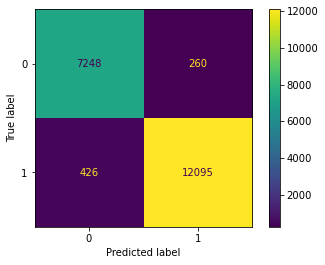

In [70]:
# evaluation

predictions = predict(X_test, model)

ConfusionMatrixDisplay.from_predictions(y_test.values, predictions)
print(f"Accuracy = {accuracy_score(y_test.values, predictions)}")
